# ***Group 5:***
Submitted by **23M0007** (*Vanhar Ali Shaik*), **23M0009** (*Ranjith A V*), **23M0035** (*Mahesh Bayas*).

The typical argument list of the function is
**(SwpCQrtr,TprRatio,AspctRatio,NLtcX,NLtcY)**

where,

SwpCQrtr: Sweep angle of the quarter-chord line (in degrees); positive (resp. negative) imply swept
forward (resp. backward) wings

TprRatio: Taper ratio (ct/cr)

AspctRatio: Aspect ratio

NLtcX: No. of vortex lattices arrayed along longitudinal (i.e., x-axis) of wing

NLtcY: No. of vortex lattices arrayed along the half-span (i.e., y-axis) of wing

N.B.: We are not accounting for camber or wing twist since the program is specialized for planar
wings.

Following Bertin textbook notations for bound vortex coordinates ((x1n, y1n),(x2n, y2n)),and control points (xm, ym)

SwpCQrtr denotes quater chord sweep angle

tr represents taper ratio

b represents span of wing

nLtcx and nLtcy represent number of divisions along longitudinal axis and lateral axis (along half wing span) respectively

AR represents Aspect ratio

cr and ct represent root chord and tip chord length

c denotes spanwise chord length distribution from root to tip

Uinf denotes freestream velocity

alpha denotes angle of attack

S denotes surface area of wing

input the wing geometry and freestream parameters

sweptback if sweep angle (-)

sweptforward if sweep angle (+)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

span = 1 #saying the value of span of wing is equal to 1,can be changed according to the question.
# The typical argument list of the function VLM.
def VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY):
  SwpCQrtr=-1*SwpCQrtr #To account for -ve angle for swept back and +ve angle for swept forward
  tr=TprRatio   #Taper ratio which is ct/cr.
  nLtcx=NLtcX   #No. of vortex lattices arrayed along longitudinal (i.e., x-axis) of wing
  nLtcy=NLtcY   #No. of vortex lattices arrayed along the half-span (i.e., y-axis) of wing
  AR=AspctRatio #represents Aspect ratio.
  b=span        #represents span of wing.
  cr=2*b/AR/(1+tr) #represent root chord length.
  ct=tr*cr  #represents tip chord length.
  rho=1.22  #denotes freestream density.
  Uinf=1    #denotes freestream velocity.
  alpha=10  #denotes angle of attack.

  S=((ct+cr)/2)*b  #Calculating area of the wing.
  print("The length of root chord: ",cr)
  print("The length of tip chord: ",ct)

# where delta is the swept angle of the wing leading edge
# The Leading edge sweep angle varies for delta (pure delta i.e taper ratio =0) and general wing
  if tr == 0:
    delta= np.arctan(4*(1-tr)/AR/(1+tr))
  else:
    delta=np.arctan((cr-ct+2*b*np.tan(SwpCQrtr*np.pi/180))/(2*b))

# To store all the chord length values along the span from root to tip varying with taper ratio
  c = np.zeros(nLtcy+1)
  for i in range(nLtcy+1):
    chord=cr-(i*(cr-ct)/nLtcy)
    c[i]=chord   # Distribution of chord length.
  print("The chord length distribution from root to tip: ",c)
  print("The sweep angle of wing leading edge: ",delta*180/np.pi, "\u00B0")

# declaring the arrays to store all the coordinates of bound vortex and control points
  x1n = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of root side of star board side of bound vortex .
  x2n = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of tip side of star board side of bound vortex .

  y1n = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of root side of star board side of bound vortex .
  y2n = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of tip side of star board side of bound vortex .

  xm = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of control points.
  ym = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of control points

  Y1n = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of root side of port board side of bound vortex.
  Y2n = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of tip side of port board side of bound vortex .

  xl1 = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of root side of star board side of leading edge .
  xl2 = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of tip side of star board side of leading edge .

  yl1 = np.zeros((nLtcx, nLtcy))
  # to store y co-ordinates of root side of star board side of leading edge .
  yl2 = np.zeros((nLtcx, nLtcy))
  #to store y co-ordinates of tip side of star board side of leading edge .

  xt1 = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of root side of star board side of trailing edge .
  xt2 = np.zeros((nLtcx, nLtcy))
  #to store x co-ordinates of tip side of star board side of trailing edge .

#trailing edge y coordinates are same as leading edge y coordinates


# calculating the coordinates of bound vortex and control points for each panel of NLtcX * NLtcY divisions
# Y1n and Y2n denote the span wise coordinates of bound vortex on port side of wing
# x1n and x2n values remain same on port and star board side y1n and y2n values will differ
  k=0                  # Considering the planar wing condition.
  for i in range(nLtcx):
    for j in range(nLtcy):
      # calculating the x positions of the bound vortex
      x1n[i][j]=(j*np.tan(delta)*(b/2)/nLtcy) + (c[j]/(nLtcx*4)+i*c[j]/nLtcx)
      x2n[i][j]=((j+1)*np.tan(delta)*(b/2)/nLtcy) + (c[j+1]/(nLtcx*4)+i*c[j+1]/nLtcx)

      # calculating leading edge and trailing edge line coordinates
      xl1[i][j]=(j)*np.tan(delta)*(b/2)/nLtcy
      xl2[i][j]=(j+1)*np.tan(delta)*(b/2)/nLtcy
      xt1[i][j]=(j)*np.tan(delta)*(b/2)/nLtcy+c[j]
      xt2[i][j]=(j+1)*np.tan(delta)*(b/2)/nLtcy+c[j+1]

      # calculating the y positions of the bound vortex
      y1n[i][j]=j*(b/2)/nLtcy
      y2n[i][j]=(j+1)*(b/2)/nLtcy

      Y1n[i][j] = -1*y1n[i][j]
      Y2n[i][j] = -1*y2n[i][j]

      xm[i][j]=(xl1[i][j]+xl2[i][j])/2+((c[j]+c[j+1])/(2*nLtcx))*0.75+(i*(c[j]+c[j+1])/(2*nLtcx))
      ym[i][j]=((y1n[i][j]+y2n[i][j])/2)


  # to print the coordinates of bound vortex, control points, leading edge and trailing edge
  for i in range(nLtcx):
    for j in range(nLtcy):
      plt.plot([x1n[i][j], x2n[i][j]], [y1n[i][j], y2n[i][j]], marker='o', color='yellow')
      plt.plot([x1n[i][j], x2n[i][j]], [Y1n[i][j], Y2n[i][j]], marker='o', color='yellow')
      plt.plot(xm[i][j], ym[i][j],xm[i][j], -1*ym[i][j], marker='o', color='blue',markersize=2)
      plt.plot()
      plt.plot([xl1[i][j], xl2[i][j]], [y1n[i][j], y2n[i][j]], marker='o', color='red')
      plt.plot([xl1[i][j], xl2[i][j]], [Y1n[i][j], Y2n[i][j]], marker='o', color='red')
      plt.plot([xt1[i][j], xt2[i][j]], [y1n[i][j], y2n[i][j]], marker='o', color='red')
      plt.plot([xt1[i][j], xt2[i][j]], [Y1n[i][j], Y2n[i][j]], marker='o', color='red')
  plt.plot([xl2[i][j], xt2[i][j]], [y2n[i][j], y2n[i][j]], marker='o', color='red')
  plt.plot([xl2[i][j], xt2[i][j]], [Y2n[i][j], Y2n[i][j]], marker='o', color='red')
  plt.title('Panel representation of swept planar wing')
  plt.xlabel('longitudinal-axis (x)')
  plt.ylabel('span wise-axis (y)')
  plt.show()


# to calculate the downwash at panel 1 due to the contribution of panel 1,2,3...(NLtcX * NLtcY).
# similarly calculating downwash at panel 2 due to the contribution of panel 1,2,3...(NLtcX * NLtcY).
# and also accounting for the contribution of panels of port side of the wing on star board side.
# storing all the circulation coefficients in the matrix g
  g = []
  for i in range(nLtcx):
    for j in range(nLtcy):
      m = 0
      ws = np.zeros((nLtcx*nLtcy))
      for k in range(nLtcx):
        for l in range(nLtcy):
          ws[m]=(1/((xm[i][j]-x1n[k][l])*(ym[i][j]-y2n[k][l])-(xm[i][j]-x2n[k][l])*(ym[i][j]-y1n[k][l]))*(((x2n[k][l]-x1n[k][l])*(xm[i][j]-x1n[k][l])+(y2n[k][l]-y1n[k][l])*(ym[i][j]-y1n[k][l]))/np.sqrt((xm[i][j]-x1n[k][l])**2+(ym[i][j]-y1n[k][l])**2)-((x2n[k][l]-x1n[k][l])*(xm[i][j]-x2n[k][l])+(y2n[k][l]-y1n[k][l])*(ym[i][j]-y2n[k][l]))/np.sqrt((xm[i][j]-x2n[k][l])**2+(ym[i][j]-y2n[k][l])**2))+(1/(y1n[k][l]-ym[i][j])*(1+(xm[i][j]-x1n[k][l])/np.sqrt((xm[i][j]-x1n[k][l])**2+(ym[i][j]-y1n[k][l])**2))-(1/(y2n[k][l]-ym[i][j])*(1+(xm[i][j]-x2n[k][l])/np.sqrt((xm[i][j]-x2n[k][l])**2+(ym[i][j]-y2n[k][l])**2)))))-\
          (1/((xm[i][j]-x1n[k][l])*(ym[i][j]-Y2n[k][l])-(xm[i][j]-x2n[k][l])*(ym[i][j]-Y1n[k][l]))*(((x2n[k][l]-x1n[k][l])*(xm[i][j]-x1n[k][l])+(Y2n[k][l]-Y1n[k][l])*(ym[i][j]-Y1n[k][l]))/np.sqrt((xm[i][j]-x1n[k][l])**2+(ym[i][j]-Y1n[k][l])**2)-((x2n[k][l]-x1n[k][l])*(xm[i][j]-x2n[k][l])+(Y2n[k][l]-Y1n[k][l])*(ym[i][j]-Y2n[k][l]))/np.sqrt((xm[i][j]-x2n[k][l])**2+(ym[i][j]-Y2n[k][l])**2))+(1/(Y1n[k][l]-ym[i][j])*(1+(xm[i][j]-x1n[k][l])/np.sqrt((xm[i][j]-x1n[k][l])**2+(ym[i][j]-Y1n[k][l])**2))-(1/(Y2n[k][l]-ym[i][j])*(1+(xm[i][j]-x2n[k][l])/np.sqrt((xm[i][j]-x2n[k][l])**2+(ym[i][j]-Y2n[k][l])**2)))))
          m = m + 1
      g.append(ws)
      ws = np.zeros((nLtcx*nLtcy))


# to calculate the inverse of the matrix g
  h = np.linalg.inv(g)

# calculating the circulation values by solving for X in [A][X]=[B] matrix

  gamma=[]
  for i in range(nLtcx):
    sum=0
    for j in range(nLtcy):
      sum=sum+h[j]          # transpose matrix (ht) not used
    gamma.append(sum)
# calculating total circulation
  total_gamma = -1*4*np.pi*b*Uinf*alpha*(np.pi/180)*np.sum(gamma)*(b/(2*nLtcy))

  Lift=2*rho*Uinf*total_gamma
  print("The Lift force is: ",Lift," N")

  Cl=Lift/(0.5*rho*(Uinf**2)*S)
  print("The Lift coefficient is: ",Cl, "at 10\u00B0 AOA")
  print("The Lift curve slope is: ",Cl/(alpha),"per degree")
  print("The Lift curve slope is: ",Cl/(alpha*np.pi/180), "per radian")

  print("\n*******************************************************************\n")

**----------------------------------------------------------------------------**

**Example 7.2**

Quarter chord Sweep angle: 45$°$

Taper ratio: 1

Aspect ratio: 5

No. of divisions along chord (nLtcx): 1

No. of divisions along span (nLtcy): 4



The length of root chord:  0.2
The length of tip chord:  0.2
The chord length distribution from root to tip:  [0.2 0.2 0.2 0.2 0.2]
The sweep angle of wing leading edge:  45.0 °


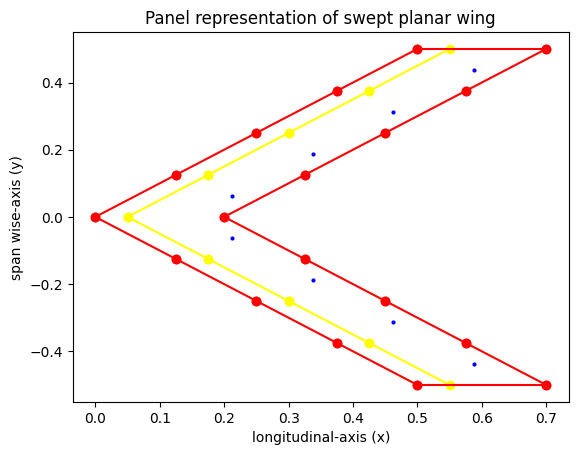

The Lift force is:  0.0733379237479665  N
The Lift coefficient is:  0.6011305225243155 at 10° AOA
The Lift curve slope is:  0.060113052252431555 per degree
The Lift curve slope is:  3.444224187713715 per radian

*******************************************************************



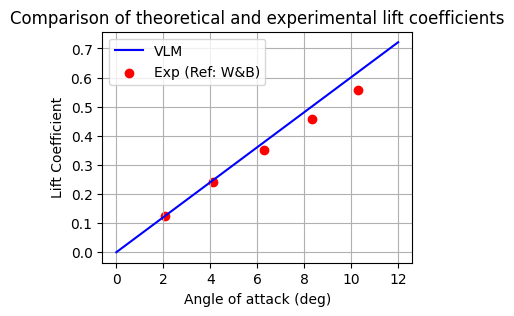

In [ ]:
# VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY)
VLM(-45, 1, 5, 1, 4)

# Comparing results with experimental values
Slope = 3.444224187713715    # in per radians
Slope1 = Slope*np.pi/180     # in per degrees

x1 = np.linspace (0,12,400)
x2 = [2.0625, 4.1042, 6.2708, 8.3125, 10.2917]

# assuming the wing section as symmetric
y1 = Slope1*x1
y2 = [0.1239, 0.2427, 0.3511, 0.4573, 0.5583]


plt.figure(figsize=(4,3))
plt.plot(x1,y1, color='blue', label = "VLM")
plt.scatter(x2,y2, color='red',marker='o', label = "Exp (Ref: W&B)")

plt.xlabel('Angle of attack (deg)')
plt.ylabel('Lift Coefficient')
plt.title('Comparison of theoretical and experimental lift coefficients')
plt.legend()
plt.grid(True)
plt.show()

**----------------------------------------------------------------------------**

**Problem 7.9 (part-a)**

Quarter chord Sweep angle: 45$°$

Taper ratio: 1

Aspect ratio: 8

No. of divisions along chord (nLtcx): 1

No. of divisions along span (nLtcy): 4

The length of root chord:  0.125
The length of tip chord:  0.125
The chord length distribution from root to tip:  [0.125 0.125 0.125 0.125 0.125]
The sweep angle of wing leading edge:  45.0 °


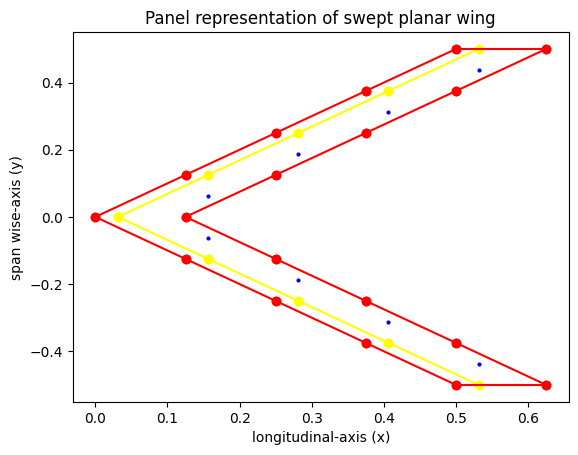

The Lift force is:  0.05040227145814218  N
The Lift coefficient is:  0.6610133961723565 at 10° AOA
The Lift curve slope is:  0.06610133961723566 per degree
The Lift curve slope is:  3.7873277802285075 per radian

*******************************************************************



In [ ]:
# VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY)
VLM(-45, 1, 8, 1, 4)

**----------------------------------------------------------------------------**

**Problem 7.9 (part-b)**

Comparing lift curve slope of two aspect ratios from example 7.12 (AR=5) and problem 7.9 (AR=8)

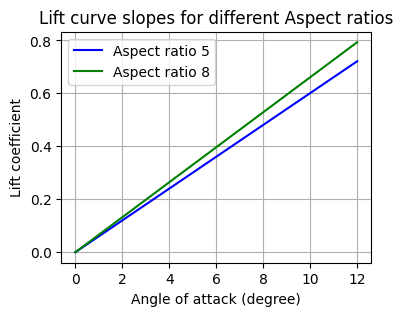

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given slopes
slope1 = 3.444224187713715  #per radians
slope1 = slope1*np.pi/180   #per degree
slope2 = 3.7873277802285075 #per radians
slope2 = slope2*np.pi/180   #per degree
AR1=5
AR2=8

x = np.linspace(0, 12, 400)


# Assuming the wing section (airfoil) to be symmetric
y1 = slope1 * x
y2 = slope2 * x


plt.figure(figsize=(4, 3))
plt.plot(x, y1, color='blue', label=f'Aspect ratio {AR1}')
plt.plot(x, y2, color='green', label=f'Aspect ratio {AR2}')

plt.xlabel('Angle of attack (degree)')
plt.ylabel('Lift coefficient')
plt.title('Lift curve slopes for different Aspect ratios')

plt.legend()

plt.grid(True)
plt.show()


*From the plot above it is evident that, as the Aspect ratio of the wing increases, the lift curve slope also increases.*

**----------------------------------------------------------------------------**

**Problem 7.10**

Quarter chord Sweep angle: 45$°$

Taper ratio: 0.5

Aspect ratio: 5

No. of divisions along chord (nLtcx): 1

No. of divisions along span (nLtcy): 4

The length of root chord:  0.26666666666666666
The length of tip chord:  0.13333333333333333
The chord length distribution from root to tip:  [0.26666667 0.23333333 0.2        0.16666667 0.13333333]
The sweep angle of wing leading edge:  46.8476102659946 °


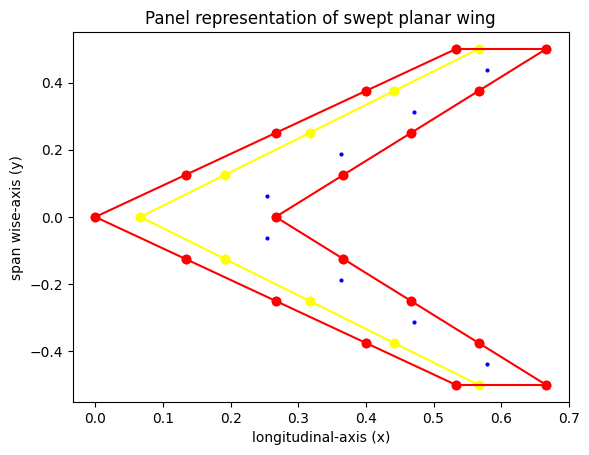

The Lift force is:  0.07616168644681202  N
The Lift coefficient is:  0.624276118416492 at 10° AOA
The Lift curve slope is:  0.0624276118416492 per degree
The Lift curve slope is:  3.5768386836074195 per radian

*******************************************************************



In [ ]:
# VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY)
VLM(-45, 0.5, 5, 1, 4)

**----------------------------------------------------------------------------**

**Problem 7.11 (a)**

Quarter chord Sweep angle: -45$°$

Taper ratio: 0.5

Aspect ratio: 3.55

No. of divisions along chord (nLtcx): 1

No. of divisions along span (nLtcy): 4

The length of root chord:  0.37558685446009393
The length of tip chord:  0.18779342723004697
The chord length distribution from root to tip:  [0.37558685 0.3286385  0.28169014 0.23474178 0.18779343]
The sweep angle of wing leading edge:  -42.17982752755151 °


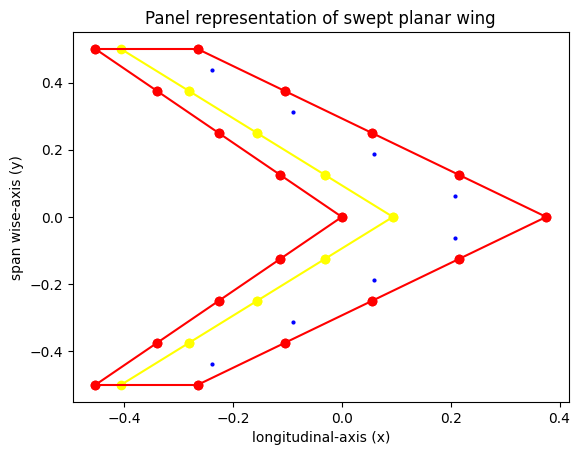

The Lift force is:  0.09178265200297178  N
The Lift coefficient is:  0.5341449419845079 at 10° AOA
The Lift curve slope is:  0.05341449419845079 per degree
The Lift curve slope is:  3.0604250823972516 per radian

*******************************************************************



In [ ]:
# VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY)
VLM(45, 0.5, 3.55, 1, 4)

Problem 7.11(b)

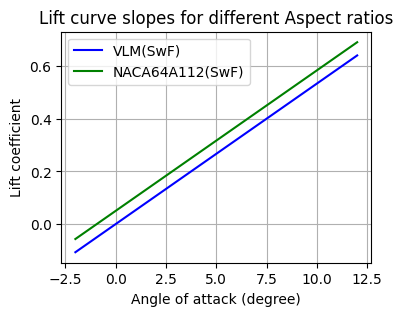

In [ ]:
# Given slopes
slope1 = 3.0604250823972516  #per radians
slope1 = slope1*np.pi/180   #per degree

x = np.linspace(-2, 12, 400)


# Assuming the wing section (airfoil) to be symmetric
y1 = slope1 * x
y2 = slope1 * (x + 0.94)


plt.figure(figsize=(4, 3))
plt.plot(x, y1, color='blue', label= "VLM(SwF)")
plt.plot(x, y2, color='green', label="NACA64A112(SwF)")

plt.xlabel('Angle of attack (degree)')
plt.ylabel('Lift coefficient')
plt.title('Lift curve slopes for different Aspect ratios')

plt.legend()

plt.grid(True)
plt.show()

**----------------------------------------------------------------------------**

**Problem 7.12**

Quarter chord Sweep angle: 45$°$

Taper ratio: 0

Aspect ratio: 1.5

No. of divisions along chord (nLtcx): 1

No. of divisions along span (nLtcy): 4

The length of root chord:  1.3333333333333333
The length of tip chord:  0.0
The chord length distribution from root to tip:  [1.33333333 1.         0.66666667 0.33333333 0.        ]
The sweep angle of wing leading edge:  69.44395478041653 °


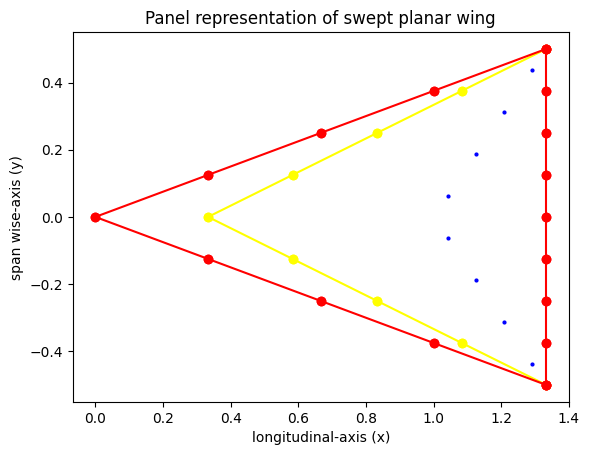

The Lift force is:  0.12709984187457915  N
The Lift coefficient is:  0.31254059477355534 at 10° AOA
The Lift curve slope is:  0.03125405947735553 per degree
The Lift curve slope is:  1.7907257007033237 per radian

*******************************************************************



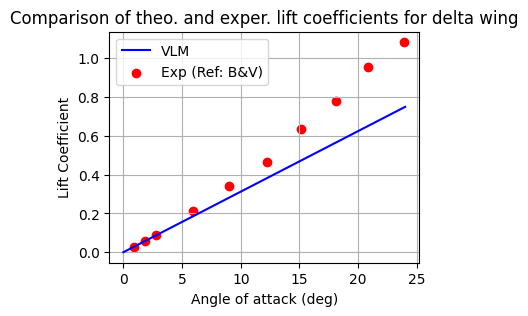

In [ ]:
# VLM(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY)
VLM(-45, 0, 1.5, 1, 4)

# Comparing results with experimental values
Slope = 1.7907257007033237    # in per radians
Slope1 = Slope*np.pi/180     # in per degrees

x1 = np.linspace (0,24,400)
x2 = [0.9090, 1.8182, 2.7778, 5.9091, 8.9899, 12.2727, 15.1515, 18.0808,20.8585, 23.9393]

# assuming the wing section as symmetric
y1 = Slope1*x1
y2 = [0.0294, 0.0591, 0.0888, 0.2136, 0.3424, 0.4673, 0.6337, 0.7823, 0.9546, 1.0834]


plt.figure(figsize=(4,3))
plt.plot(x1,y1, color='blue', label = "VLM")
plt.scatter(x2,y2, color='red',marker='o', label = "Exp (Ref: B&V)")

plt.xlabel('Angle of attack (deg)')
plt.ylabel('Lift Coefficient')
plt.title('Comparison of theo. and exper. lift coefficients for delta wing')
plt.legend()
plt.grid(True)
plt.show()
